<a href="https://colab.research.google.com/github/shelausadi/Thinkful-Datasets/blob/master/Capstones/Unsupervised_Learning/Unsupervised_Learning_Capstone_Indonesian_Election_2019_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Capstone: Indonesian Election 2019 Sentiment Analysis

### Author: Shela Usadi
shelausadi@gmail.com

As an Indonesian citizen who has been living in the United States for a while, I often struggle to keep up with news of what is going on in Indonesia. However, I always make it a point to follow the Indonesian presidential elections because I've always had a keen interest in politics. Before realizing my love for technology, my life's goal was to be the president of Indonesia.

The 2019 Indonesian presidential election was a controversial one. It was a[ close election](
https://www.scmp.com/week-asia/explained/article/3005438/indonesia-election-presidential-race-down-wire-between-joko) between the incumbent, Joko Widodo (Jokowi) and Prabowo Subianto. The result of this election was so close that both candidates declared victory and even though Jokowi eventually claimed victory, there are still protests going on urging a recount of the results months after the election results were announced.

In this project, I used tweets pulled from the Twitter API to perform sentiment analysis on the two candidates to see if it could predict the result of the election. 

####Steps
1. Pull public opinion in the form of tweets from the Twitter API
2. Translate the Indonesian Tweets to English (remove emojis)
3. Run sentiment analysis of the tweets
4. Additional data analysis on the translated tweets

###Installing the necessary modules 

In [0]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment


     |████████████████████████████████| 133kB 5.0MB/s 


In [0]:
import tweepy
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer

###Pulling out Tweets from the Twitter API

In [0]:
consumer_key = 'aOJYldbihdCqnDvnH3HPt9LMh'
consumer_secret = 'a1Hca3cDQmfkcrWzRmtv5SaOmuXAP175yxmZ99UmoYhd1Csp9X'
access_token = '886677825134108677-3SW3lPOQGReaJio4zxeKy6TLd4zGKHl'
access_token_secret = 'S9ilQy4kUEblvYXMSmiVZQTl9WFr98LzknlXDYtwFjIpR'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

jokowi_tweets = api.search('Jokowi', count=100000)
prabowo_tweets = api.search('Prabowo', count=100000)

jokowi_data = pd.DataFrame(data=[tweet.text for tweet in jokowi_tweets], columns=['Tweets'])
prabowo_data = pd.DataFrame(data=[tweet.text for tweet in prabowo_tweets], columns=['Tweets'])

jokowi_data.head(3)
print(jokowi_tweets[0].created_at)

prabowo_data.head(3)

print(prabowo_tweets[0].created_at)

2019-06-08 23:42:02
2019-06-08 23:42:03


###Cleaning the Tweets

Let's take out the mentions (@%) and urls since they do not give any value to our analysis. 

In [0]:
import re
  
clean_tweets = []

for index, row in jokowi_data.iterrows():
  clean_string = re.sub(r"(?:\@|https?\://)\S+", "", row['Tweets'])

  clean_tweets.append(clean_string)

ct = pd.Series(clean_tweets)
jokowi_data['Clean Tweets'] = ct.values

display(jokowi_data.head(3))


,Tweets,Clean Tweets
0,"RT @jokowi: Malam di Yogyakarta, menikmati sat...","RT Malam di Yogyakarta, menikmati sate gembus..."
1,RT @kaesangp: Terima kasih sudah mempercayakan...,RT Terima kasih sudah mempercayakan saya untu...
2,RT @BrataWijaya27: Mblegedeesss\n\nSampai lang...,RT Mblegedeesss\n\nSampai langit uambrukpun t...


In [0]:
clean_tweets2 = []

for index, row in prabowo_data.iterrows():
  clean_string2 = re.sub(r"(?:\@|https?\://)\S+", "", row['Tweets'])

  clean_tweets2.append(clean_string2)

ct2 = pd.Series(clean_tweets2)
prabowo_data['Clean Tweets'] = ct2.values

display(prabowo_data.head(3))


,Tweets,Clean Tweets
0,RT @fullmoonfolks: Mau nanya apakah benar kala...,RT Mau nanya apakah benar kalau jihad bela pr...
1,@prabowo Damaikanlah Indonesia Jadilah Kebaika...,Damaikanlah Indonesia Jadilah Kebaikan tanpa ...
2,RT @andre_rosiade: Yang disampaikan oleh pak @...,RT Yang disampaikan oleh pak di depan wartaw...


###DeEmofiying the Tweets 

We need to translate the texts from Indonesian to English next but before that, we need to take out the emojis in order for the translator to work. 

In [0]:
deEmojify_list = []

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
  
for index, row in jokowi_data.iterrows():
  de = deEmojify(row["Clean Tweets"])
  deEmojify_list.append(de)
  
dee = pd.Series(deEmojify_list)
jokowi_data['DeEmojified Tweets'] = dee.values

jokowi_data.head(3)



,Tweets,Clean Tweets,DeEmojified Tweets
0,"RT @jokowi: Malam di Yogyakarta, menikmati sat...","RT Malam di Yogyakarta, menikmati sate gembus...","RT Malam di Yogyakarta, menikmati sate gembus..."
1,RT @kaesangp: Terima kasih sudah mempercayakan...,RT Terima kasih sudah mempercayakan saya untu...,RT Terima kasih sudah mempercayakan saya untu...
2,RT @BrataWijaya27: Mblegedeesss\n\nSampai lang...,RT Mblegedeesss\n\nSampai langit uambrukpun t...,RT Mblegedeesss\n\nSampai langit uambrukpun t...


In [0]:
deEmojify_list2 = []
  
for index, row in prabowo_data.iterrows():
  de2 = deEmojify(row["Clean Tweets"])
  deEmojify_list2.append(de2)
  
dee2 = pd.Series(deEmojify_list2)
prabowo_data['DeEmojified Tweets'] = dee2.values

prabowo_data.head(3)

,Tweets,Clean Tweets,DeEmojified Tweets
0,RT @fullmoonfolks: Mau nanya apakah benar kala...,RT Mau nanya apakah benar kalau jihad bela pr...,RT Mau nanya apakah benar kalau jihad bela pr...
1,@prabowo Damaikanlah Indonesia Jadilah Kebaika...,Damaikanlah Indonesia Jadilah Kebaikan tanpa ...,Damaikanlah Indonesia Jadilah Kebaikan tanpa ...
2,RT @andre_rosiade: Yang disampaikan oleh pak @...,RT Yang disampaikan oleh pak di depan wartaw...,RT Yang disampaikan oleh pak di depan wartaw...


###Translating the Tweets from Indonesian to English

In [0]:
! pip install googletrans

  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [0]:
from googletrans import Translator
translator = Translator()

translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.id',
    ])


translations = translator.translate(list(jokowi_data['DeEmojified Tweets']), dest='en', src='id')
translations2 = translator.translate(list(prabowo_data['DeEmojified Tweets']), dest='en', src='id')


In [0]:
translated_tweets = []
for t in translations:
  translated_tweets.append(t.text)

jokowi_data['Translated Tweets']=translated_tweets
jokowi_data.head(3)

,Tweets,Clean Tweets,DeEmojified Tweets,Translated Tweets
0,"RT @jokowi: Malam di Yogyakarta, menikmati sat...","RT Malam di Yogyakarta, menikmati sate gembus...","RT Malam di Yogyakarta, menikmati sate gembus...","RT Malam in Yogyakarta, enjoy the blowing sata..."
1,RT @kaesangp: Terima kasih sudah mempercayakan...,RT Terima kasih sudah mempercayakan saya untu...,RT Terima kasih sudah mempercayakan saya untu...,RT Thank you for entrusting me to fanning the ...
2,RT @BrataWijaya27: Mblegedeesss\n\nSampai lang...,RT Mblegedeesss\n\nSampai langit uambrukpun t...,RT Mblegedeesss\n\nSampai langit uambrukpun t...,RT Mblegedeesss\n\nEven though the sky is brok...


In [0]:
translated_tweets2 = []
for t in translations2:
  translated_tweets2.append(t.text)

prabowo_data['Translated Tweets']=translated_tweets2
prabowo_data.head(3)

,Tweets,Clean Tweets,DeEmojified Tweets,Translated Tweets
0,RT @fullmoonfolks: Mau nanya apakah benar kala...,RT Mau nanya apakah benar kalau jihad bela pr...,RT Mau nanya apakah benar kalau jihad bela pr...,RT Want to ask whether it is true that prabowo...
1,@prabowo Damaikanlah Indonesia Jadilah Kebaika...,Damaikanlah Indonesia Jadilah Kebaikan tanpa ...,Damaikanlah Indonesia Jadilah Kebaikan tanpa ...,Reconcile Indonesia Be Good without having to ...
2,RT @andre_rosiade: Yang disampaikan oleh pak @...,RT Yang disampaikan oleh pak di depan wartaw...,RT Yang disampaikan oleh pak di depan wartaw...,RT What was conveyed by the pack in front of t...


###Wordclouds

In [0]:
jokowi_text = " ".join(tweet for tweet in jokowi_data['Translated Tweets'])
print("There are {} words in the combination of all Jokowi tweets.".format(len(jokowi_text)))
prabowo_text = " ".join(tweet for tweet in prabowo_data['Translated Tweets'])
print("There are {} words in the combination of all Prabowo tweets.".format(len(prabowo_text)))


There are 4640 words in the combination of all Jokowi tweets.
There are 3328 words in the combination of all Prabowo tweets.


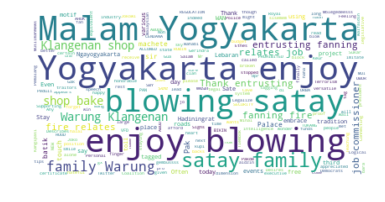

In [0]:
stopwords = set(STOPWORDS)
stopwords.update(["Birthday", "RT", "Pancasila", "years", "ago", "Jokowi", "Prabowo"])

jokowi_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(jokowi_text)

# Display the generated image:
plt.imshow(jokowi_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

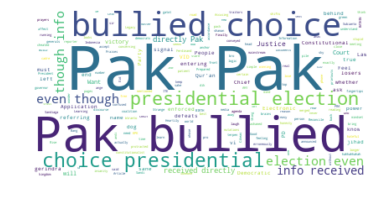

In [0]:
prabowo_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(prabowo_text)

# Display the generated image:
plt.imshow(prabowo_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Perfoming Sentiment Analysis 

In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
sid = SentimentIntensityAnalyzer()

sentiment_analysis = []

for index, row in jokowi_data.iterrows():
  ss = sid.polarity_scores(row["Translated Tweets"])
  sentiment_analysis.append(ss)
  
se = pd.Series(sentiment_analysis)
jokowi_data['Polarity'] = se.values

jokowi_data.head(3)

,Tweets,Clean Tweets,DeEmojified Tweets,Translated Tweets,Polarity
0,"RT @jokowi: Malam di Yogyakarta, menikmati sat...","RT Malam di Yogyakarta, menikmati sate gembus...","RT Malam di Yogyakarta, menikmati sate gembus...","RT Malam in Yogyakarta, enjoy the blowing sata...","{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp..."
1,RT @kaesangp: Terima kasih sudah mempercayakan...,RT Terima kasih sudah mempercayakan saya untu...,RT Terima kasih sudah mempercayakan saya untu...,RT Thank you for entrusting me to fanning the ...,"{'neg': 0.105, 'neu': 0.786, 'pos': 0.109, 'co..."
2,RT @BrataWijaya27: Mblegedeesss\n\nSampai lang...,RT Mblegedeesss\n\nSampai langit uambrukpun t...,RT Mblegedeesss\n\nSampai langit uambrukpun t...,RT Mblegedeesss\n\nEven though the sky is brok...,"{'neg': 0.199, 'neu': 0.637, 'pos': 0.165, 'co..."


In [0]:
sentiment_analysis2 = []

for index, row in prabowo_data.iterrows():
  ss2 = sid.polarity_scores(row["Translated Tweets"]) 
  sentiment_analysis2.append(ss2)
  
se2 = pd.Series(sentiment_analysis2)
prabowo_data['Polarity'] = se2.values

prabowo_data.head(3)

,Tweets,Clean Tweets,DeEmojified Tweets,Translated Tweets,Polarity
0,RT @fullmoonfolks: Mau nanya apakah benar kala...,RT Mau nanya apakah benar kalau jihad bela pr...,RT Mau nanya apakah benar kalau jihad bela pr...,RT Want to ask whether it is true that prabowo...,"{'neg': 0.132, 'neu': 0.632, 'pos': 0.236, 'co..."
1,@prabowo Damaikanlah Indonesia Jadilah Kebaika...,Damaikanlah Indonesia Jadilah Kebaikan tanpa ...,Damaikanlah Indonesia Jadilah Kebaikan tanpa ...,Reconcile Indonesia Be Good without having to ...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp..."
2,RT @andre_rosiade: Yang disampaikan oleh pak @...,RT Yang disampaikan oleh pak di depan wartaw...,RT Yang disampaikan oleh pak di depan wartaw...,RT What was conveyed by the pack in front of t...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp..."


In [0]:
jokowi_data['Polarity'][0]

{'compound': 0.4939, 'neg': 0.0, 'neu': 0.862, 'pos': 0.138}

###Evaluating the result
Now let's take a look at the total sentiment for each of the candidates. 

In [0]:
negs = [element['neg'] for element in jokowi_data['Polarity'].values]
neutrals = [element['neu'] for element in jokowi_data['Polarity'].values]
positives = [element['pos'] for element in jokowi_data['Polarity'].values]
compounds = [element['compound'] for element in jokowi_data['Polarity'].values]
 
total_negs = sum(negs)
total_neutrals = sum(neutrals)
total_positives = sum(positives)
total_compounds = sum(compounds)


print('Total negative sentiment for Jokowi is', total_negs)
print('Total neutral sentiment for Jokowi is', total_neutrals)
print('Total positive sentiment for Jokowi is', total_positives)  
print('Total compound sentiment for Jokowi is', total_compounds)  

Total negative sentiment for Jokowi is 1.904
Total neutral sentiment for Jokowi is 43.135999999999996
Total positive sentiment for Jokowi is 5.9609999999999985
Total compound sentiment for Jokowi is 9.106000000000002


In [0]:
negs2 = [element['neg'] for element in prabowo_data['Polarity'].values]
neutrals2 = [element['neu'] for element in prabowo_data['Polarity'].values]
positives2 = [element['pos'] for element in prabowo_data['Polarity'].values]
compounds2 = [element['compound'] for element in prabowo_data['Polarity'].values]
 
total_negs2 = sum(negs2)
total_neutrals2 = sum(neutrals2)
total_positives2 = sum(positives2)
total_compounds2 = sum(compounds2)


print('Total negative sentiment for Prabowo is', total_negs2)
print('Total neutral sentiment for Prabowo is', total_neutrals2)
print('Total positive sentiment for Prabowo is', total_positives2)   
print('Total compound sentiment for Prabowo is', total_compounds2) 

Total negative sentiment for Prabowo is 3.4730000000000003
Total neutral sentiment for Prabowo is 26.314999999999998
Total positive sentiment for Prabowo is 3.2119999999999997
Total compound sentiment for Prabowo is -1.5690000000000004


###Conclusion
Our sentiment analysis of tweets surrounding the two candidates showed that there is more positive sentiment for Jokowi and in fact, Jokowi did win the election. I think that out result is a good indicator of public sentiment of the two candidates and that this tool can be useful for the campaign team and political spectators.